# 0.0 - Import Bibliotecas

In [55]:
# Lib para modelagem de dados
import pandas as pd

# Libs para analise gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 1.0 - Processo ETL

In [56]:
# Importando arquivo

df = pd.read_csv('Base_dados.csv')

In [57]:
# Visualizando dados

df.head()

,Unnamed: 0,Rotulo,Quantidade,Periodo
0,0,FEMINICÍDIO,10,2021-12-01
1,1,FEMINICÍDIO,9,2021-11-01
2,2,FEMINICÍDIO,9,2021-10-01
3,3,FEMINICÍDIO,6,2021-09-01
4,4,FEMINICÍDIO,8,2021-08-01


In [58]:
# Excluindo Colunas desnecessárias

del df['Unnamed: 0']

In [59]:
df.head()

,Rotulo,Quantidade,Periodo
0,FEMINICÍDIO,10,2021-12-01
1,FEMINICÍDIO,9,2021-11-01
2,FEMINICÍDIO,9,2021-10-01
3,FEMINICÍDIO,6,2021-09-01
4,FEMINICÍDIO,8,2021-08-01


In [60]:
# Verificando campos nulos

df.isnull().sum()

Rotulo        0
Quantidade    0
Periodo       0
dtype: int64

In [61]:
# Verificando INFOS

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rotulo      48 non-null     object
 1   Quantidade  48 non-null     int64 
 2   Periodo     48 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.2+ KB


In [62]:
# Convertendo tipo - Periodo - de:object para:datetime

df['Periodo'] = df['Periodo'].astype('datetime64[ns]')

In [63]:
# Verificando INFOS

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Rotulo      48 non-null     object        
 1   Quantidade  48 non-null     int64         
 2   Periodo     48 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.2+ KB


In [64]:
# Estatística descritiva

df.describe()

,Quantidade
count,48.000000
mean,13.229167
std,5.348452
min,5.000000
25%,9.000000
50%,12.500000
75%,17.000000
max,27.000000


In [65]:
# Incluir o periodo como index

df2 = df.set_index('Periodo')

df2.head()

,Rotulo,Quantidade
Periodo,,
2021-12-01,FEMINICÍDIO,10
2021-11-01,FEMINICÍDIO,9
2021-10-01,FEMINICÍDIO,9
2021-09-01,FEMINICÍDIO,6
2021-08-01,FEMINICÍDIO,8


In [66]:
# Retirando a coluna - Rotulo
df2.drop( columns='Rotulo', inplace=True )

df2.head()

,Quantidade
Periodo,
2021-12-01,10
2021-11-01,9
2021-10-01,9
2021-09-01,6
2021-08-01,8


# 2.0 - Visualization

In [90]:
# --- Plotly - Linhas
px.line( df2, y='Quantidade', x = df2.index, 
        title = 'Plot 1 - Quantidade por Ano',
        width=700, height=500)

In [106]:
# Plotly - Boxplot
px.box( df2, y='Quantidade',
       title = 'Plot 2 - Distribuição dos casos',
       width=500 )

In [110]:
# plotly - Barras
px.bar( df2, x=df2.index, y='Quantidade',
       title = 'Plot 3 - Quantidade por Ano',
       # title_x = 0.5,
       width=700, height=500)

## 2.1 - Média Móvel

In [70]:
# Media móvel a cada Trimestre

df2.sort_index( inplace=True )

# Gerando a média móvel

df2['Média Movel'] = df2.rolling(3).mean()

df2.head()

,Quantidade,Média Movel
Periodo,,
2018-01-01,5,NaN
2018-02-01,8,NaN
2018-03-01,8,7.000000
2018-04-01,14,10.000000
2018-05-01,16,12.666667


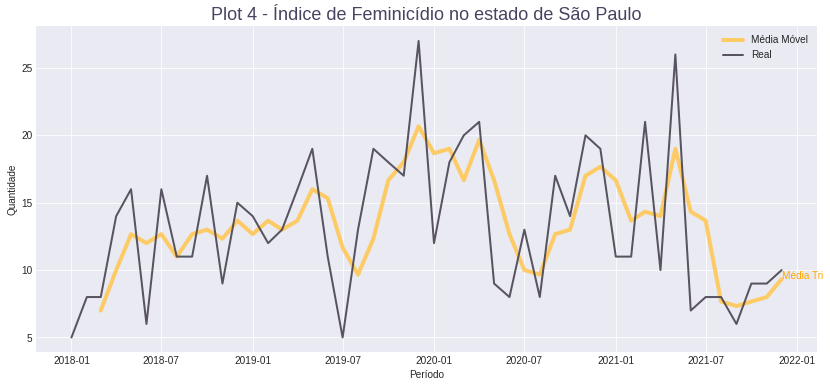

In [112]:
# Alterando  o estilo  do matplot
plt.style.use('seaborn-darkgrid')

# Alterar tamhho
plt.figure( figsize=(14, 6) )

# Plotar media movel
plt.plot( df2.index, df2['Média Movel'], linewidth=4, alpha=0.9, color='#ffc857' )

# Incluir no nome da linha
plt.text( df2.index[-1], df2['Média Movel'].tail(1), 'Média Tri', color='orange' )

# plotar o valor real
plt.plot( df2.index, df2['Quantidade'], linewidth=2, alpha=0.9, color='#474350' )

# Labels
plt.xlabel('Período')
plt.ylabel('Quantidade')

# Legenda
plt.legend( ['Média Móvel', 'Real'] )

# titulo
plt.title('Plot 4 - Índice de Feminicídio no estado de São Paulo', fontsize=18, color='#474360' );

# 3.0 - Times Series

In [72]:
# Ajustar os dados

df2_serie = df2.drop( columns='Média Movel')

In [73]:
df2_serie.head()

,Quantidade
Periodo,
2018-01-01,5
2018-02-01,8
2018-03-01,8
2018-04-01,14
2018-05-01,16


In [74]:
# Divisão dos dados Treino e Teste

# Dados de Treino
Treino = round( len(df2_serie) * 0.75 )

# Dados de Teste
Teste = len(df2_serie) - Treino

print(f'Vamos ter {Treino} registros no TREINO do Modelo')
print(f'Vamos ter {Teste} registros no TESTE do Modelo')

Vamos ter 36 registros no TREINO do Modelo
Vamos ter 12 registros no TESTE do Modelo


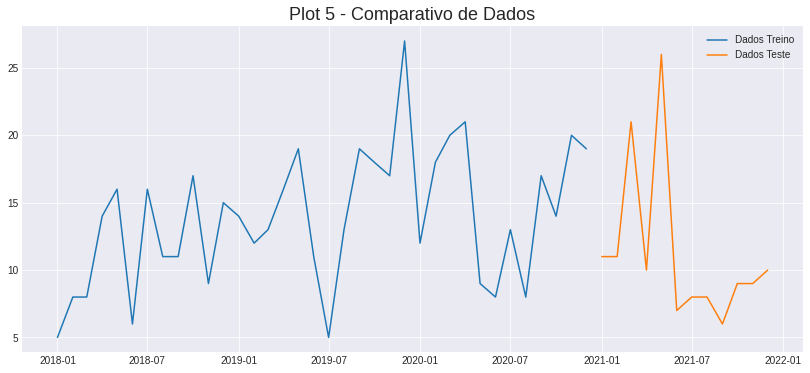

In [126]:
# Verificar a divisão
Dados_Treino = df2_serie[0:Treino]
Dados_Teste = df2_serie[-Teste:]

# Tamanho do gráfico
plt.figure( figsize=(14, 6) )

# Plots dos valores
plt.plot( Dados_Treino )
plt.plot( Dados_Teste )

# Titulo
plt.title('Plot 5 - Comparativo de Dados',fontsize=18)

# legeda
plt.legend( ['Dados Treino', 'Dados Teste'] );

In [77]:
# Exclusão de "WARNINGS"

import warnings
warnings.filterwarnings('ignore')

# Criando modelo de ML

from statsmodels.tsa.api import ExponentialSmoothing

# Definindo parametros para o modelo

Funcao_Serie_Temporal = ExponentialSmoothing(
    Dados_Treino,
    seasonal_periods=7,
    trend='additive',
    seasonal='additive' ).fit()

In [78]:
# Fazendo as previsções
Previsao = Funcao_Serie_Temporal.forecast( Teste )

# Incluir esses dados em um DF
Base_Previsao = pd.DataFrame( Previsao )

# Renomear a coluuna
Base_Previsao.rename( columns={0:'Previsão'}, inplace=True )

# Join ( Unir Teste x Previsao )
Juntando_Bases = pd.concat( [Dados_Teste, Base_Previsao], axis=1 )

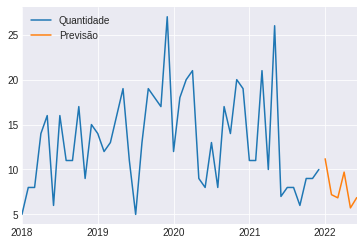

In [122]:
# Plot
Juntando_Bases.plot();

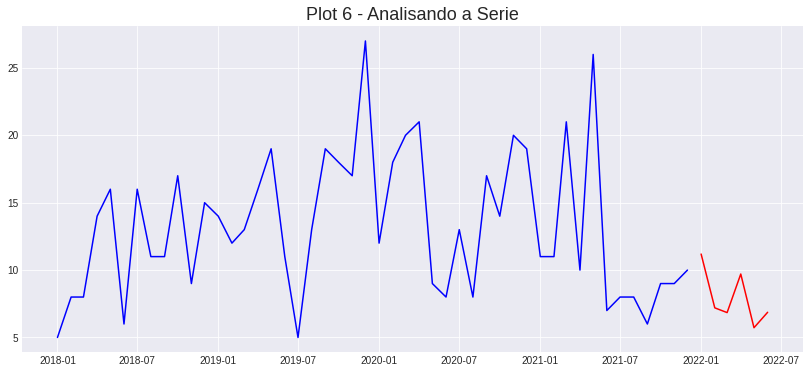

In [127]:
# Plot
Juntando_Bases_02 = pd.concat( [ df2_serie, Base_Previsao] )

plt.figure( figsize=(14, 6) )
plt.title('Plot 6 - Analisando a Serie', fontsize = 18)
plt.plot( df2_serie, 'blue')
plt.plot( Base_Previsao, 'red' );

In [83]:
# Selecionando uma medida de desempenho

from sklearn.metrics import mean_squared_error  #RMSE

# Calcular o erro

mean_squared_error( Dados_Teste, Previsao, squared=False )

9.673660590114405

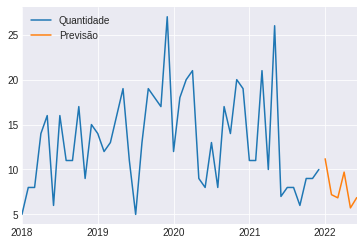

In [87]:
# Prever proximo semestre

# Definir os parametros do Modelo
Funcao_Serie_Temporal_02 = ExponentialSmoothing(
    df2_serie,
    seasonal_periods=7,
    trend='additive',
    seasonal='additive', 
    ).fit()

# Fazendo as previsções
Previsao = Funcao_Serie_Temporal_02.forecast( 6 )

# Incluir esses dados em um DF
Base_Previsao = pd.DataFrame( Previsao )

# Renomear a coluna
Base_Previsao.rename( columns={0:'Previsão'}, inplace=True )

# Join ( Unir Teste x Previsao )
Juntando_Bases = pd.concat( [df2_serie, Base_Previsao], axis=1 )

Juntando_Bases.plot();

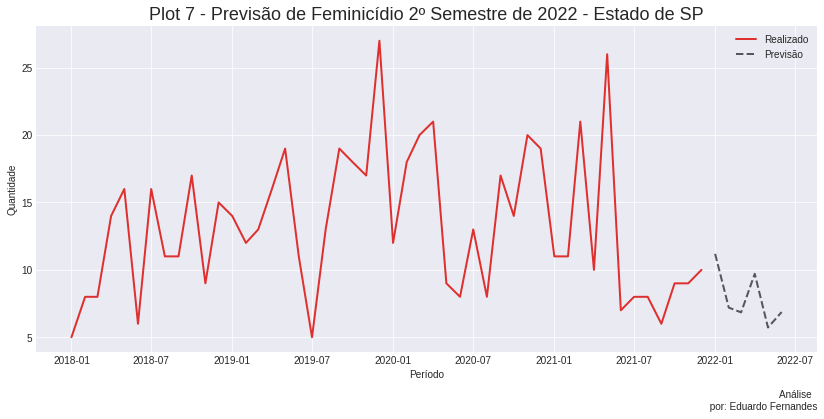

In [125]:
# Alterar o style do matplot
plt.style.use('seaborn-darkgrid')

# Alterar tamhho
plt.figure( figsize=(14, 6) )

# Plotar media movel
plt.plot( Juntando_Bases['Quantidade'], linewidth=2, alpha=0.9, color='#dd1c1a' )

# plotar o valor real
plt.plot( Juntando_Bases['Previsão'], linestyle='dashed', linewidth=2, alpha=0.9, color='#474350' )

# Labels
plt.xlabel('Período')
plt.ylabel('Quantidade')

# LEgenda
plt.legend( ['Realizado', 'Previsão'] )

# titulo
plt.title('Plot 7 - Previsão de Feminicídio 2º Semestre de 2022 - Estado de SP', loc='center', fontsize=18,)

# Anotação
plt.annotate(
    'Análise  \n por: Eduardo Fernandes',
    xy = (1.0, -0.15),
    xycoords='axes fraction',
    ha = 'right',
    va = 'center',
    fontsize=10
);